In [124]:
import pandas as pd
import re

In [125]:
url1 = '_chat 4.txt'
url2 = 'WhatsApp Chat with Iiit unofficial.txt'

In [126]:
file = open(url1,'r',encoding='utf-8')

In [127]:
data=file.read()

In [128]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
date_pattern = r'\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}'
pattern1 = r'\[\d{1,2}\/\d{1,2}\/\d{1,2}\,\s\d{1,2}\:\d{1,2}\:\d{1,2}\]\s'

In [129]:
messages = re.split(pattern,data)[1:]

In [130]:
if len(messages)==0:
    messages = re.split(pattern1,data)[1:]

In [131]:
dates = re.findall(date_pattern,data)

In [132]:
df = pd.DataFrame({"date":dates,"message":messages})
df

,date,message
0,"14/06/23, 16:05",Vikas Iiit Cse Cr: Contact card omitted\n
1,"14/06/23, 16:05",Vikas Iiit Cse Cr: Jisko aj k session k regard...
2,"14/06/23, 16:32",~ Vikas Niranjan: Unsolved karne hai kya eg ma...
3,"14/06/23, 17:01",~ Soukhya gonde: Nahi\n
4,"14/06/23, 17:01",~ Vikas Niranjan: Kuch bachoo ne kar liye hain\n
...,...,...
4870,"10/10/24, 14:38",~ Rudra Jani: Are yaar koi bhi ajao\n
4871,"10/10/24, 14:38",~ Rudra Jani: 🙂\n
4872,"10/10/24, 15:03",Madhav Iiit: Sachme koi bhi\n
4873,"10/10/24, 15:04",~ Rudra Jani: Ab hogaya\n


In [133]:
df['date'] = pd.to_datetime(df['date'])
df

/var/folders/hz/5f5vbq1x2f946nh8dq84fyc80000gn/T/ipykernel_21810/1621113520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,date,message
0,2023-06-14 16:05:00,Vikas Iiit Cse Cr: Contact card omitted\n
1,2023-06-14 16:05:00,Vikas Iiit Cse Cr: Jisko aj k session k regard...
2,2023-06-14 16:32:00,~ Vikas Niranjan: Unsolved karne hai kya eg ma...
3,2023-06-14 17:01:00,~ Soukhya gonde: Nahi\n
4,2023-06-14 17:01:00,~ Vikas Niranjan: Kuch bachoo ne kar liye hain\n
...,...,...
4870,2024-10-10 14:38:00,~ Rudra Jani: Are yaar koi bhi ajao\n
4871,2024-10-10 14:38:00,~ Rudra Jani: 🙂\n
4872,2024-10-10 15:03:00,Madhav Iiit: Sachme koi bhi\n
4873,2024-10-10 15:04:00,~ Rudra Jani: Ab hogaya\n


In [134]:
users=[]
msg=[]

for i in df['message']:
    entry = re.split(r'([\w\W]+?):\s',i)
    if entry[1:]:
        users.append(entry[1])
        msg.append(entry[2])
    else:
        users.append('group notification')
        msg.append(entry[0])
df['user_name'] = users
df['user_msg'] = msg
df.drop(columns=['message'],inplace=True)

In [135]:
df.sample(10)

,date,user_name,user_msg
2266,2024-02-15 17:32:00,~ Abhinav Gangwar,ha bhai ek baar confirm karlo\n
3442,2024-04-22 19:16:00,Pratham Flat Cse,Bhai dekho agr koi 7th wala kal raha hai se ka...
731,2023-08-21 01:59:00,Vikas Iiit Cse Cr,‎image omitted\n‎
364,2023-07-16 15:18:00,~ Rudra Jani,Kal se college shuru hogaya hai\nGt hai ya nah...
2042,2024-02-14 12:44:00,khushbu Iiit,‎This message was deleted.\n
628,2023-08-15 19:13:00,~ Rudra Jani,🥲\n
1461,2023-01-11 23:21:00,Gaurav Baby Pink,SHI HAI\n
2235,2024-02-15 09:51:00,~ Abhinav Gangwar,Woh keh rhe ki updated time table mein 9 se 11...
2596,2024-01-03 00:58:00,~ ..Sourav..Batch 2022-2024,yr dikat tho vhi hai na ab ye cr kuch respond ...
583,2023-12-08 20:08:00,Bhuvan Cse,GT mtlb GT bat khtm\n


In [136]:
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()

In [137]:
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [138]:
df['user_name'].value_counts().index

Index(['Vikas Iiit Cse Cr', 'Pratham Flat Cse', '~ Rudra Jani',
       '~ Abhinav Gangwar', 'khushbu Iiit', '~ ..Sourav..Batch 2022-2024',
       'Punya Modi Iiit', 'Gaurav Baby Pink', '~ Chikki', 'Labhanshu Meetha',
       '~ Shreyansh Dwivedi', '~ Vikas Niranjan', '~ HARSHIT MAHOUR',
       '~ Riyansh Chouhan', 'Pankaj Bhatinda', '~ Harshit Vashistha',
       '‪+91 98785 54771‬', '~ Shouvik', 'Raghav Iiit', '~ Soukhya gonde',
       '~ Ajay Mahdoriya', '~ Prathamesh', 'Madhav Iiit', '~ ..', 'Nihar Neta',
       '~ ÃÎGÂ✨', '~ ♥️', '‪+91 90984 24766‬', 'Puru Arora CSE', 'Bhuvan Cse',
       'Protien Iiitb', 'Atharv Iiit', '~ Maaz Amir', 'Kunal',
       'Govind Maggu Iiit', '~ Anish Dhomase', '~ Azhar', '~ 🍨🍫',
       'Vidushi Iiit', '~ omkar', '~ Sai Harshith Eedara',
       'Gujju Ganjedi Iiit', '~ Shiva Raghav', 'Naman Iiit Cs', '~ Anant',
       '~ Manjeet', 'Abdulla Iiit Cse', '~ Ashish Morwal', '‪+91 96534 55718‬',
       '~ shivamgupta', '~ mohit Verma', '~ Pathlavath Rahul',
   

In [165]:
df[df['user_msg']=='‎image omitted\n'].shape[0]

112

In [140]:
!pip3 install urlextract


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [141]:
from urlextract import URLExtract

extract = URLExtract()
urls=[]
for i in df['user_msg']:
    urls.extend(extract.find_urls(i))
print(len(urls))

68


In [142]:
top_user = df['user_name'].value_counts().head().index
top_msg = df['user_name'].value_counts().head().values

In [143]:
# import matplotlib.pyplot as plt
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


<BarContainer object of 5 artists>

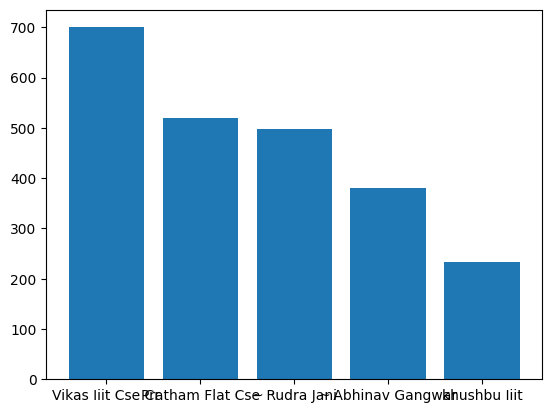

In [144]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(top_user,top_msg)
# plt.xticks(rotaion='vertical')

In [145]:
df['month'] = df['date'].dt.month

In [146]:
df

,date,user_name,user_msg,year,month_name,day,hour,minute,month
0,2023-06-14 16:05:00,Vikas Iiit Cse Cr,Contact card omitted\n,2023,June,14,16,5,6
1,2023-06-14 16:05:00,Vikas Iiit Cse Cr,Jisko aj k session k regarding doubt ho ya aag...,2023,June,14,16,5,6
2,2023-06-14 16:32:00,~ Vikas Niranjan,Unsolved karne hai kya eg main???\n,2023,June,14,16,32,6
3,2023-06-14 17:01:00,~ Soukhya gonde,Nahi\n,2023,June,14,17,1,6
4,2023-06-14 17:01:00,~ Vikas Niranjan,Kuch bachoo ne kar liye hain\n,2023,June,14,17,1,6
...,...,...,...,...,...,...,...,...,...
4870,2024-10-10 14:38:00,~ Rudra Jani,Are yaar koi bhi ajao\n,2024,October,10,14,38,10
4871,2024-10-10 14:38:00,~ Rudra Jani,🙂\n,2024,October,10,14,38,10
4872,2024-10-10 15:03:00,Madhav Iiit,Sachme koi bhi\n,2024,October,10,15,3,10
4873,2024-10-10 15:04:00,~ Rudra Jani,Ab hogaya\n,2024,October,10,15,4,10


In [147]:
timeline = df.groupby(['year','month','month_name']).count()['user_msg'].reset_index()

In [148]:
timeline

,year,month,month_name,user_msg
0,2023,1,January,103
1,2023,2,February,18
2,2023,3,March,53
3,2023,4,April,24
4,2023,5,May,21
5,2023,6,June,301
6,2023,7,July,248
7,2023,8,August,367
8,2023,9,September,128
9,2023,10,October,257


In [149]:
asd=[]
for i in range(timeline.shape[0]):
    asd.append(timeline['month_name'][i] +"-"+ str(timeline['year'][i]))

In [150]:
timeline['monthly'] = asd

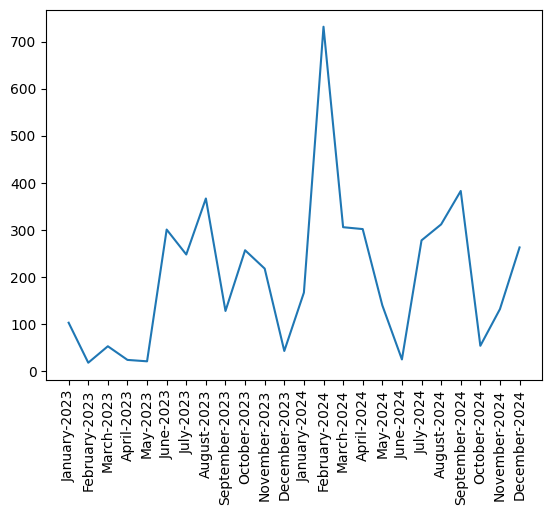

In [151]:
fig,ax = plt.subplots()
ax.plot(timeline['monthly'],timeline['user_msg'])
plt.xticks(rotation=90)
plt.show()

In [152]:
df['only_date'] = df['date'].dt.date
df

,date,user_name,user_msg,year,month_name,day,hour,minute,month,only_date
0,2023-06-14 16:05:00,Vikas Iiit Cse Cr,Contact card omitted\n,2023,June,14,16,5,6,2023-06-14
1,2023-06-14 16:05:00,Vikas Iiit Cse Cr,Jisko aj k session k regarding doubt ho ya aag...,2023,June,14,16,5,6,2023-06-14
2,2023-06-14 16:32:00,~ Vikas Niranjan,Unsolved karne hai kya eg main???\n,2023,June,14,16,32,6,2023-06-14
3,2023-06-14 17:01:00,~ Soukhya gonde,Nahi\n,2023,June,14,17,1,6,2023-06-14
4,2023-06-14 17:01:00,~ Vikas Niranjan,Kuch bachoo ne kar liye hain\n,2023,June,14,17,1,6,2023-06-14
...,...,...,...,...,...,...,...,...,...,...
4870,2024-10-10 14:38:00,~ Rudra Jani,Are yaar koi bhi ajao\n,2024,October,10,14,38,10,2024-10-10
4871,2024-10-10 14:38:00,~ Rudra Jani,🙂\n,2024,October,10,14,38,10,2024-10-10
4872,2024-10-10 15:03:00,Madhav Iiit,Sachme koi bhi\n,2024,October,10,15,3,10,2024-10-10
4873,2024-10-10 15:04:00,~ Rudra Jani,Ab hogaya\n,2024,October,10,15,4,10,2024-10-10


In [153]:
daily_timeline = df.groupby('only_date').count()['user_msg'].reset_index()

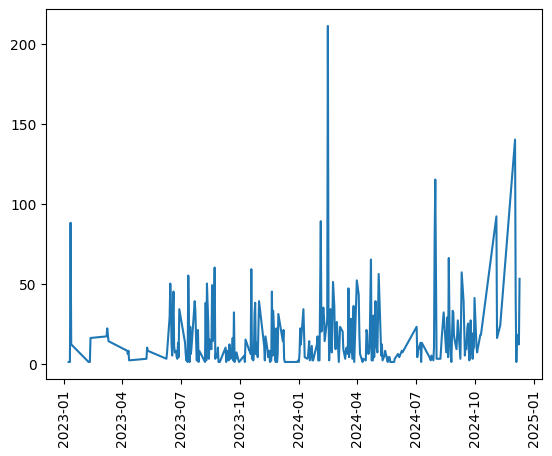

In [154]:
plt.plot(daily_timeline['only_date'],daily_timeline['user_msg'])
plt.xticks(rotation=90)
plt.show()

In [155]:
df['day_name'] = df['date'].dt.day_name()

In [156]:
weekly_tl = df['day_name'].value_counts().reset_index()

In [157]:
monthly_tl = df['month_name'].value_counts().reset_index()

In [158]:
!pip3 install emoji


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [159]:
import emoji

In [160]:
emojis_list=[]
for msg in df['user_msg']:
    emojis = emoji.distinct_emoji_list(msg)
    emojis_list.extend([emoji.demojize(is_emoji) for is_emoji in emojis])

emojis=[]
for i in emojis_list:
    ans = emoji.emojize(i)
    emojis.extend(ans)

In [161]:
from collections import Counter
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(emojis)))

In [162]:
emoji_df

,0,1
0,🙂,56
1,😂,51
2,🥲,35
3,🏻,27
4,👍,25
...,...,...
107,💪,1
108,👉,1
109,👈,1
110,🩻,1
